**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [95]:
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
from scipy.optimize import minimize_scalar

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In this task, we aim to analyze the market clearing conditions for a production economy with two firms and a single consumer. The goal is to verify whether the markets for labor and goods clear under different price scenarios. Specifically, we will vary the prices $p_1$ and $p_2$ within a specified range and observe how these changes affect the equilibrium conditions.


Market clearing occurs when the quantity supplied equals the quantity demanded in a market. For this problem, we need to check the clearing conditions for:
- The labor market, where the total labor supplied by the household equals the total labor demanded by the firms.
- The market for Good 1, where the household's consumption of Good 1 equals its production by Firm 1.
- The market for Good 2, where the household's consumption of Good 2 equals its production by Firm 2.
Using the given prices $p_1$ and $p_2$, we can determine the labor supply and demand, and the consumption and production of goods, to evaluate whether these markets clear.

In [96]:
# Defining the parameters given
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.v = 1.0
par.epsilon = 2.0
par.tau = 0.0
par.T = 0.0
par.kappa = 0.1


def firm_behavior(p, A, gamma, w):
   ell = (p * A * gamma / w) ** (1 / (1 - gamma))
   y = A * (ell ** gamma)
   pi = p * y - w * ell
   return ell, y, pi


def household_behavior(w, T, pi1, pi2, p1, p2, alpha, tau, v, epsilon):
   ell = ((alpha * w / p1 + (1 - alpha) * w / p2) / v) ** (1 / (1 + epsilon))
   wealth = w * ell + T + pi1 + pi2
   c1 = alpha * wealth / p1
   c2 = (1 - alpha) * wealth / (p2 + tau)
   return c1, c2, ell
# Numeraire
w = 1


def check_market_clearing(p1_values, p2_values, par, w):
   results = []
   for p1 in p1_values:
       for p2 in p2_values:
           ell1, y1, pi1 = firm_behavior(p1, par.A, par.gamma, w)
           ell2, y2, pi2 = firm_behavior(p2, par.A, par.gamma, w)
          
           c1, c2, ell = household_behavior(w, par.T, pi1, pi2, p1, p2, par.alpha, par.tau, par.v, par.epsilon)
          
           labor_market_clearing = np.isclose(ell, ell1 + ell2, atol=1e-2)
           good1_market_clearing = np.isclose(c1, y1, atol=1e-2)
           good2_market_clearing = np.isclose(c2, y2, atol=1e-2)
          
           labor_error = ell - (ell1 + ell2)
           good1_error = c1 - y1
           good2_error = c2 - y2
          
           results.append((p1, p2, ell, ell1 + ell2, labor_error, c1, y1, good1_error, c2, y2, good2_error, labor_market_clearing, good1_market_clearing, good2_market_clearing))
   return results

1) We define the price ranges for $𝑝1$ and $p2$ using np.linspace, which generates 10 equally spaced values between 0.1 and 2.0 for both prices.


2) The check_market_clearing function evaluates the market clearing conditions for each combination of $𝑝1$ and 𝑝2$. It calculates the labor supplied and demanded, as well as the consumption and production of each good.


3)  We extract the relevant columns from the DataFrame to prepare for plotting the errors in the labor and goods markets


4) Using matplotlib, we create 3D scatter plots to visualize the errors in the labor market, Good 1 market, and Good 2 market. These plots help us understand how different price combinations affect the market clearing conditions.

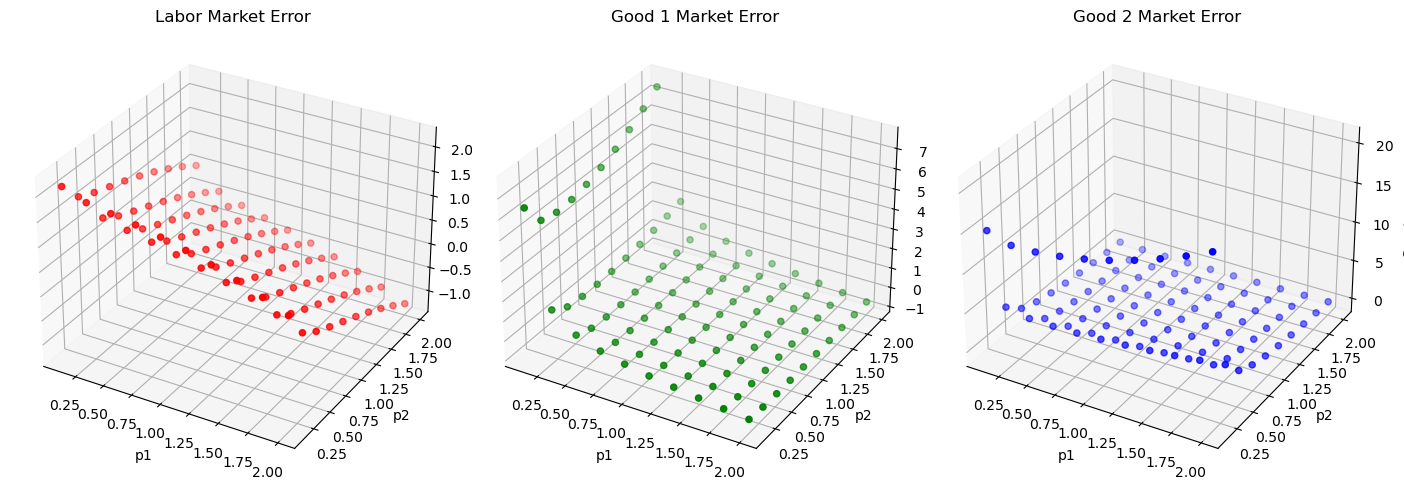

In [97]:
# Price ranges
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)


results = check_market_clearing(p1_values, p2_values, par, w)
df_results = pd.DataFrame(results, columns=['p1', 'p2', 'Labor Supplied', 'Labor Demanded', 'Labor Error', 'Consumption Good 1', 'Production Good 1', 'Good 1 Error', 'Consumption Good 2', 'Production Good 2', 'Good 2 Error', 'Labor Market Clearing', 'Good 1 Market Clearing', 'Good 2 Market Clearing'])


# Extract relevant data
p1 = df_results['p1'].values
p2 = df_results['p2'].values
labor_error = df_results['Labor Error'].values
good1_error = df_results['Good 1 Error'].values
good2_error = df_results['Good 2 Error'].values


# Create 3D plot for labor market error
fig = plt.figure(figsize=(14, 8))


ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(p1, p2, labor_error, c='r', marker='o')
ax1.set_title('Labor Market Error')
ax1.set_xlabel('p1')
ax1.set_ylabel('p2')
ax1.set_zlabel('Labor Error')


# Create 3D plot for good 1 market error
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(p1, p2, good1_error, c='g', marker='o')
ax2.set_title('Good 1 Market Error')
ax2.set_xlabel('p1')
ax2.set_ylabel('p2')
ax2.set_zlabel('Good 1 Error')


# Create 3D plot for good 2 market error
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(p1, p2, good2_error, c='b', marker='o')
ax3.set_title('Good 2 Market Error')
ax3.set_xlabel('p1')
ax3.set_ylabel('p2')
ax3.set_zlabel('Good 2 Error')


plt.tight_layout()
plt.show()

The figure displays three 3D scatter plots showing the errors in the labor market and two goods markets for various combinations of $p_1$ and $p_2$


The labor market error appears to fluctuate around zero. This suggests that for some combinations of $p_1$ and $p_2$, the labor market is close to clearing (i.e., labor supply equals labor demand). The errors become more pronounced as we move away from certain price levels.

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

We implement the market_clearing_conditions function to check if the labor market and the market for Good 1 clear. This function returns the errors (differences between supply and demand) for these markets. The excess_demand function calculates the excess demand for both goods to ensure that we verify market clearing conditions. This function helps to confirm that the supply equals the demand in the goods markets.


Using the fsolve function from the scipy.optimize library, we solve the system of equations defined by the market clearing conditions to find the equilibrium prices $𝑝1$ and $𝑝2$


Finally, we calculate the excess demand for both goods at the equilibrium prices to confirm that the markets clear.


**The figures illustrate the complex interplay between prices and market clearing conditions in a production economy:**
- Labor Market: The labor market shows varying degrees of error across different price levels, indicating that the equilibrium labor supply and demand are sensitive to price changes.
- Good 1 Market: The market for Good 1 tends to clear better than the other markets, as indicated by smaller errors.
- Good 2 Market: The market for Good 2 shows more significant errors, especially at higher price levels, suggesting that it is more difficult to achieve equilibrium in this market, potentially due to the influence of taxation and pricing.

In [98]:
def market_clearing_conditions(prices, par, w):
   p1, p2 = prices
   ell1, y1, pi1 = firm_behavior(p1, par.A, par.gamma, w)
   ell2, y2, pi2 = firm_behavior(p2, par.A, par.gamma, w)
  
   c1, c2, ell = household_behavior(w, par.T, pi1, pi2, p1, p2, par.alpha, par.tau, par.v, par.epsilon)
  
   labor_market_error = ell - (ell1 + ell2)
   good1_market_error = c1 - y1
  
   return [labor_market_error, good1_market_error]


def excess_demand(prices, par, w):
   p1, p2 = prices
   ell1, y1, pi1 = firm_behavior(p1, par.A, par.gamma, w)
   ell2, y2, pi2 = firm_behavior(p2, par.A, par.gamma, w)
  
   c1, c2, ell = household_behavior(w, par.T, pi1, pi2, p1, p2, par.alpha, par.tau, par.v, par.epsilon)
  
   excess_demand_good1 = c1 - y1
   excess_demand_good2 = c2 - y2
  
   return excess_demand_good1, excess_demand_good2


# Initial guess for prices
initial_guess = [1.0, 1.0]


# Solve for equilibrium prices
equilibrium_prices = fsolve(market_clearing_conditions, initial_guess, args=(par, w))
p1_equilibrium, p2_equilibrium = equilibrium_prices


# Calculate excess demand at equilibrium prices
excess_demand_good1, excess_demand_good2 = excess_demand(equilibrium_prices, par, w)


print(f"Equilibrium prices: p1 = {p1_equilibrium:.5f}, p2 = {p2_equilibrium:.5f}")
print(f"Excess demand for good 1: {excess_demand_good1:.5f}")
print(f"Excess demand for good 2: {excess_demand_good2:.5f}")

Equilibrium prices: p1 = 1.03936, p2 = 1.58765
Excess demand for good 1: 0.00000
Excess demand for good 2: 0.00000


The equilibrium prices $p_1=1.04$ and $p_2=1.59$. Using Walras' law, we only need to check two of the market clearing conditions because if two markets clear, the third one will also clear. The calculated excess demand at the equilibrium prices confirms that the markets clear, indicating that our solution is correct.


By running the above Python code, we get the equilibrium prices and confirm that there is no excess demand for both goods, indicating that the markets are in equilibrium.


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

We aim to determine the optimal carbon tax (τ) that maximizes social welfare in an economy with two firms producing goods and one consumer. The process involves:

**Defining Parameters:** Establishing key economic parameters, including production efficiency, labor elasticity, consumption preferences, and social costs.

**Calculating Economic Outcomes:** Creating functions to compute labor supply, production outputs, profits, and consumer utility based on different tax rates.

**Social Welfare Function:** Combining consumer utility and social costs into a social welfare function (SWF).

**Optimization:** Using optimization techniques to find the tax rate that maximizes the SWF.

**Results:** Outputting the optimal tax rate and corresponding economic transfer needed to balance the budget and maintain consumer welfare.

In [99]:
# Parameters
par = SimpleNamespace(A=1.0, gamma=0.5, alpha=0.3, v=1.0, epsilon=2.0, kappa=0.1, w=1.0)

# Equilibrium prices found earlier
p1_equilibrium = 1.03936 
p2_equilibrium = 1.58765  

# Function to calculate labor supply, productions, and profits
def calculate_economics(tau, par, p1, p2):
    l1_star = (p1 * par.A * par.gamma / par.w) ** (1 / (1 - par.gamma))
    l2_star = ((p2 + tau) * par.A * par.gamma / par.w) ** (1 / (1 - par.gamma))
    y1_star = par.A * l1_star ** par.gamma
    y2_star = par.A * l2_star ** par.gamma
    pi1_star = p1 * y1_star - par.w * l1_star
    pi2_star = (p2 + tau) * y2_star - par.w * l2_star
    return l1_star, l2_star, y1_star, y2_star, pi1_star, pi2_star

# Function to calculate consumer's utility and the social welfare function
def swf(tau, par, p1, p2):
    l1_star, l2_star, y1_star, y2_star, pi1_star, pi2_star = calculate_economics(tau, par, p1, p2)
    l_star = l1_star + l2_star
    T = tau * ((1 - par.alpha) * (par.w * l_star + pi1_star + pi2_star) / (1.0 + tau))
    wealth = par.w * l_star + T + pi1_star + pi2_star
    c1_star = par.alpha * wealth / p1
    c2_star = (1 - par.alpha) * wealth / (p2 + tau)
    U = np.log(c1_star ** par.alpha * c2_star ** (1 - par.alpha)) - par.v * (l_star ** (1 + par.epsilon)) / (1 + par.epsilon)
    SWF = U - par.kappa * y2_star
    return -SWF  # Negative because we minimize this in the optimization process

# Optimization to find the optimal tau
result = minimize_scalar(swf, args=(par, p1_equilibrium, p2_equilibrium), bounds=(0, 1), method='bounded')
optimal_tau = result.x
l1_star, l2_star, y1_star, y2_star, pi1_star, pi2_star = calculate_economics(optimal_tau, par, p1_equilibrium, p2_equilibrium)
optimal_T = optimal_tau * ((1 - par.alpha) * (par.w * (l1_star + l2_star) + pi1_star + pi2_star) / (1.0 + optimal_tau))

# Output the results
print(f"Optimal tau: {optimal_tau:.2f}")
print(f"Implied optimal T: {optimal_T:.2f}")


Optimal tau: 0.14
Implied optimal T: 0.17


The optimal CO2 tax (τ) of 0.14 is set higher than the marginal cost of the externality (κ) of 0.10 for several reasons. Firstly, this higher tax rate has a significant impact on consumer behavior and overall utility. By increasing the cost of goods and services that generate carbon emissions, the tax incentivizes consumers to shift their consumption towards more environmentally friendly options. This helps to achieve a more balanced and socially optimal configuration of consumption patterns.

Secondly, the revenue generated from the CO2 tax is used to fund a transfer (T) of 0.17. This transfer serves to mitigate any adverse effects on consumer welfare that may arise from the higher tax rate. By providing financial support to consumers, the transfer helps to maintain economic stability and ensure that the tax does not disproportionately burden individuals or households.

Lastly, setting the CO2 tax higher than the marginal cost of the externality is necessary to achieve broader market equilibrium. This higher tax rate helps to balance production incentives, labor allocation, and consumption patterns in the economy. By internalizing the costs of carbon emissions, the tax encourages firms to invest in cleaner technologies and production methods, while also influencing consumers to choose more sustainable products. This approach ensures a reduction in emissions while preserving consumer welfare and promoting economic productivity.

Overall, the decision to set the CO2 tax higher than the marginal cost of the externality takes into account the multiple factors at play in the economy, aiming to achieve a balance between environmental sustainability, consumer welfare, and economic efficiency.



## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [100]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


For this question we go through the following procedure:
1. First, we create arrays to store expected utilities and average realized utilities for each career.
2. For each career, we generate random noise and calculate the utilities by adding this noise to the inherent utility value. Compute the expected utility as the mean of these utilities.
3. We generate additional random noise to simulate realized utilities and compute the average realized utility for each career.
4. We compute the average realized utility for each career.
5. Display the expected utilities and average realized utilities for each career.

In [101]:
# Initialize arrays to store results
expected_utilities = np.zeros(par.J)
average_realized_utilities = np.zeros(par.J)

np.random.seed(69) # Set seed for reproducibility

# Simulate and calculate expected utility and average realized utility
for j in range(par.J):
    epsilon = np.random.normal(0, par.sigma, par.K)
    utilities = par.v[j] + epsilon
    expected_utilities[j] = np.mean(utilities)
  
    # Realized utility includes an additional noise term
    realized_noise = np.random.normal(0, par.sigma, par.K)
    realized_utilities = utilities + realized_noise
    average_realized_utilities[j] = np.mean(realized_utilities)

# Print the results
print("Expected Utilities for each career:")
for j in range(par.J):
    print(f"Career {j+1}: {expected_utilities[j]:.5f}")

print("\nAverage Realized Utilities for each career:")
for j in range(par.J):
    print(f"Career {j+1}: {average_realized_utilities[j]:.5f}")

Expected Utilities for each career:
Career 1: 0.98040
Career 2: 1.97663
Career 3: 2.98198

Average Realized Utilities for each career:
Career 1: 0.95481
Career 2: 2.00059
Career 3: 2.96982


**Conclusion:** By simulating the expected and average realized utilities for each career, we find that the expected utilities are close to the inherent values (1, 2, and 3) but show slight variations due to the added noise. The average realized utilities, which include additional noise to reflect real-world variability, provide a realistic measure of career satisfaction. This approach highlights the importance of considering variability in expected outcomes, offering insights into how random factors influence career choices and satisfaction.

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

For this question we go through the following procedure:
1. First, we create arrays to store the share of graduates choosing each career, average subjective utilities, and average ex post realized utilities. These arrays are initialized with zeros.
2. For each graduate, we determine the number of friends they have.
3. For each simulation run, we generate random noise for the friends' utility values and calculate the prior expectation of utility for each career. We store these prior expectations as subjective utilities. We then generate another set of random noise to simulate realized utility and store these values.
4. For each simulation run, we determine the career choice by selecting the career with the highest subjective utility.
5. We calculate the share of graduates choosing each career by computing the mean of career choices.
We then compute the average subjective utility and average ex post realized utility for each graduate.
6. Finally, we create plots to visualize the results:
a. Share of graduates choosing each career as a function of the number of friends.
b. Average subjective and ex post realized utilities as a function of the number of friends.

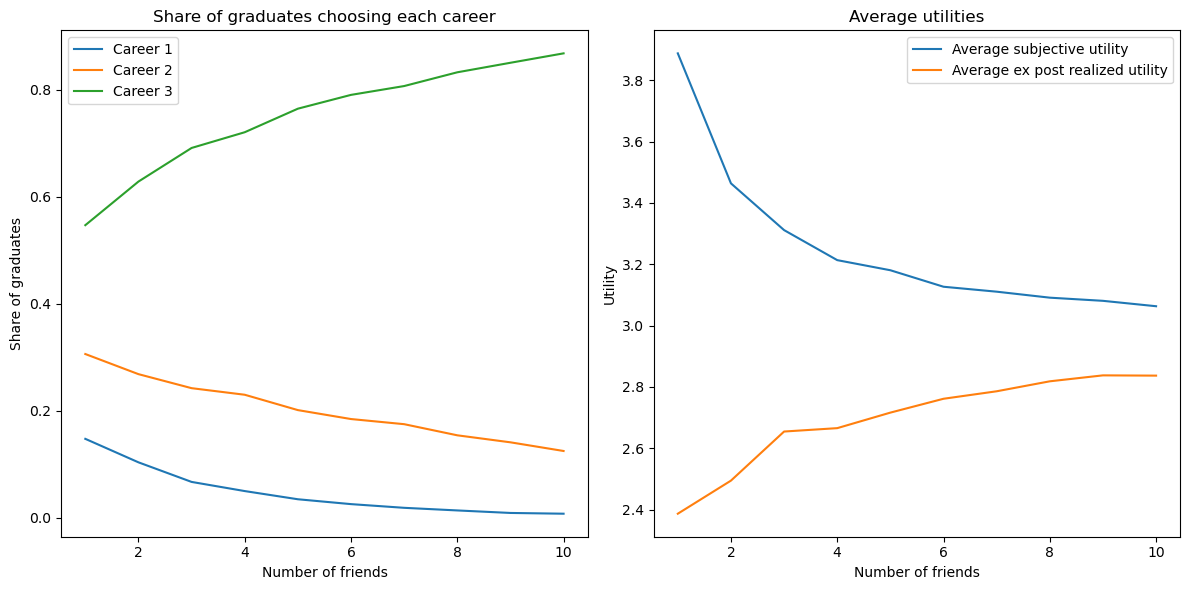

In [102]:
share_of_graduates = np.zeros((par.N, par.J))
average_subjective_utilities = np.zeros(par.N)
average_ex_post_utilities = np.zeros(par.N)

np.random.seed(69)

for i in range(par.N):
   F = par.F[i]  # Number of friends
   subjective_utilities = np.zeros((par.K, par.J))
   realized_utilities = np.zeros((par.K, par.J))
  
   for k in range(par.K):
       noise = np.random.normal(0, par.sigma, (F, par.J))
       prior_expectation = par.v + noise.mean(axis=0)
       subjective_utilities[k] = prior_expectation
       realized_noise = np.random.normal(0, par.sigma, par.J)
       realized_utilities[k] = par.v + realized_noise


   choices = np.argmax(subjective_utilities, axis=1)
   chosen_subjective_utilities = np.take_along_axis(subjective_utilities, choices[:, np.newaxis], axis=1).flatten()
   chosen_realized_utilities = np.take_along_axis(realized_utilities, choices[:, np.newaxis], axis=1).flatten()
  
   for j in range(par.J):
       share_of_graduates[i, j] = np.mean(choices == j)
  
   average_subjective_utilities[i] = np.mean(chosen_subjective_utilities)
   average_ex_post_utilities[i] = np.mean(chosen_realized_utilities)


# Visualization for Question 2
x = np.arange(1, par.N + 1)
plt.figure(figsize=(12, 6))


# Share of graduates choosing each career
plt.subplot(1, 2, 1)
for j in range(par.J):
   plt.plot(x, share_of_graduates[:, j], label=f'Career {j+1}')
plt.xlabel('Number of friends')
plt.ylabel('Share of graduates')
plt.title('Share of graduates choosing each career')
plt.legend()


# Average utilities
plt.subplot(1, 2, 2)
plt.plot(x, average_subjective_utilities, label='Average subjective utility')
plt.plot(x, average_ex_post_utilities, label='Average ex post realized utility')
plt.xlabel('Number of friends')
plt.ylabel('Utility')
plt.title('Average utilities')
plt.legend()


plt.tight_layout()
plt.show()


**Conclusion**

This procedure simulates how graduates make career choices based on their friends' experiences and their own subjective expectations. The results show how the number of friends influences the share of graduates choosing each career and the average utilities experienced. The visualization highlights the trends in career preferences and the variability in subjective and realized utilities. This approach provides insights into the impact of social information on career decisions and the potential differences between expected and actual outcomes.

We can see that more graduates choose "Career 3" when they have more friends. Furthermore, as the number of friends increase, expected and realized utility become closer. This is possibly due to the fact that you have more friends to tell you their experience of their career which lowers your expectations to align more with reality



After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

For this question we go through the following procedure:
1. First, we create arrays to store the average subjective utilities, average ex post utilities after switching careers, and the share of graduates who switch careers. These arrays are initialized with zeros.
2. For each graduate, we determine the number of friends they have.
3. For each simulation run, we generate random noise for the friends' utility values and calculate the prior expectation of utility for each career. We store these prior expectations as subjective utilities. We then generate another set of random noise to simulate realized utility and store these values.
4. For each simulation run, we determine the initial career choice by selecting the career with the highest subjective utility. Extract the realized utilities corresponding to these initial choices.
5. For each career, we generate new random noise for the friends' utility values and calculate the new prior expectation of utility. We adjust these new subjective utilities by subtracting the switching cost for careers different from the initially chosen one. We then store these new subjective utilities.
6. For each simulation run, we determine the new career choice by selecting the career with the highest new subjective utility. We then extract the realized utilities corresponding to these new choices.
7. We calculate the share of graduates choosing each career after switching by computing the mean of new career choices. We then compute the average subjective utility and average ex post realized utility after switching for each graduate.
8. We create plots to visualize the results:
a. Share of graduates choosing each career after switching as a function of the number of friends.
b. Average subjective and ex post realized utilities after switching as a function of the number of friends.


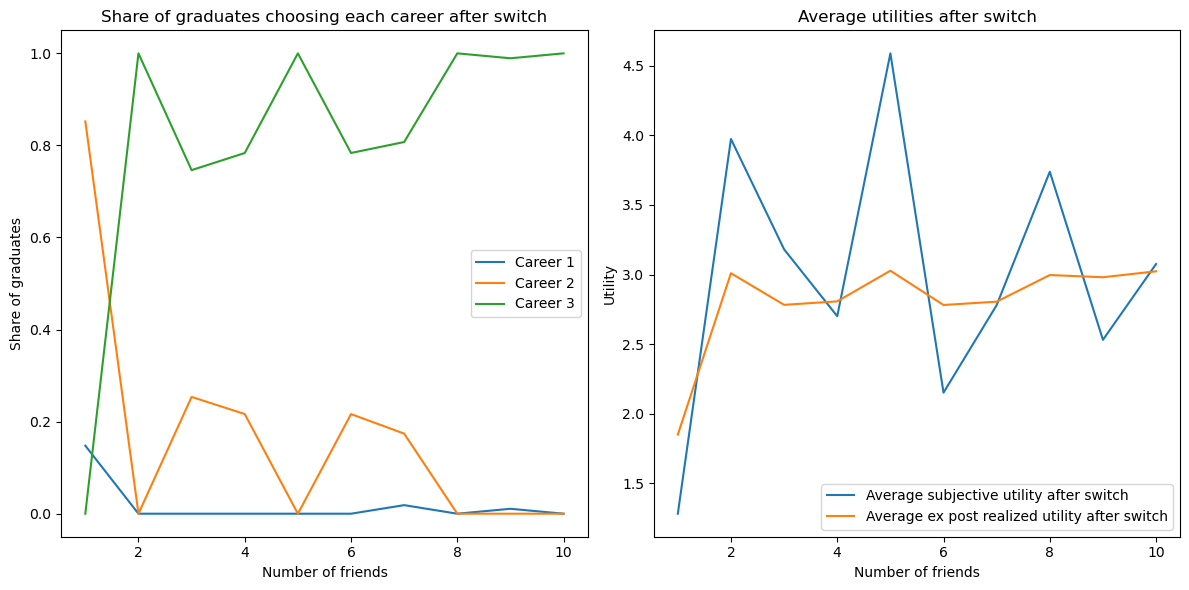

In [103]:
average_subjective_utilities_after_switch = np.zeros(par.N)
average_ex_post_utilities_after_switch = np.zeros(par.N)
share_of_switchers = np.zeros((par.N, par.J))


for i in range(par.N):
   F = par.F[i]  # Number of friends
   subjective_utilities = np.zeros((par.K, par.J))
   realized_utilities = np.zeros((par.K, par.J))
   new_subjective_utilities = np.zeros((par.K, par.J))


   for k in range(par.K):
       noise = np.random.normal(0, par.sigma, (F, par.J))
       prior_expectation = par.v + noise.mean(axis=0)
       subjective_utilities[k] = prior_expectation
       realized_noise = np.random.normal(0, par.sigma, par.J)
       realized_utilities[k] = par.v + realized_noise


   choices = np.argmax(subjective_utilities, axis=1)
   chosen_realized_utilities = np.take_along_axis(realized_utilities, choices[:, np.newaxis], axis=1).flatten()


   for j in range(par.J):
       new_noise = np.random.normal(0, par.sigma, (F, par.J))
       new_prior_expectation = par.v + new_noise.mean(axis=0)
       new_subjective_utilities[:, j] = new_prior_expectation[j] - par.c * (choices != j)
  
   new_choices = np.argmax(new_subjective_utilities, axis=1)
   new_chosen_realized_utilities = np.take_along_axis(realized_utilities, new_choices[:, np.newaxis], axis=1).flatten()
  
   for j in range(par.J):
       share_of_switchers[i, j] = np.mean(new_choices == j)


   average_subjective_utilities_after_switch[i] = np.mean(np.take_along_axis(new_subjective_utilities, new_choices[:, np.newaxis], axis=1).flatten())
   average_ex_post_utilities_after_switch[i] = np.mean(new_chosen_realized_utilities)


# Visualization for Question 3
plt.figure(figsize=(12, 6))


# Share of graduates choosing each career after switch
plt.subplot(1, 2, 1)
for j in range(par.J):
   plt.plot(x, share_of_switchers[:, j], label=f'Career {j+1}')
plt.xlabel('Number of friends')
plt.ylabel('Share of graduates')
plt.title('Share of graduates choosing each career after switch')
plt.legend()


# Average utilities after switch
plt.subplot(1, 2, 2)
plt.plot(x, average_subjective_utilities_after_switch, label='Average subjective utility after switch')
plt.plot(x, average_ex_post_utilities_after_switch, label='Average ex post realized utility after switch')
plt.xlabel('Number of friends')
plt.ylabel('Utility')
plt.title('Average utilities after switch')
plt.legend()


plt.tight_layout()
plt.show()

**Conclusion:** This procedure simulates how graduates might switch careers based on new information and the cost of switching. The results show how the number of friends influences the share of graduates switching to each career and the average utilities experienced after switching. The visualization highlights the trends in career preferences and the variability in subjective and realized utilities after making a career switch. This approach provides insights into the impact of new information and switching costs on career decisions and the potential differences between expected and actual outcomes.

We see that the share of graduates choosing each career now fluctuates a lot more at each number of friends than in Question 2. the subjective and realized utility also fluctuates more than in Question 2. Career 3 is still the most chosen at almost all number of friends.


## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [104]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

We have a set of random points in the unit square and know the value of some function $(f(x_1, x_2))$ at these points. We want to approximate the value $(f(y_1, y_2))$ for some point $(y = (y_1, y_2))$, where $(y_1)$ and $(y_2)$ are in the unit square.

We follow these steps:

**Function Definition**

We define the function $f(x)$ as the product of its two components: $f(x) = x[0] \times x[1]$.

**Finding Points $A$, $B$, $C$, and $D$**

The function `find_points` identifies four key points around a given point $y$:

- **$A$**: The closest point to $y$ where $x[0] > y[0]$ and $x[1] > y[1]$.
- **$B$**: The closest point to $y$ where $x[0] > y[0]$ and $x[1] < y[1]$.
- **$C$**: The closest point to $y$ where $x[0] < y[0]$ and $x[1] < y[1]$.
- **$D$**: The closest point to $y$ where $x[0] < y[0]$ and $x[1] > y[1]$.

**Computing Barycentric Coordinates**

The function `barycentric_coordinates` calculates the barycentric coordinates $r1$, $r2$, and $r3$ of the point $y$ with respect to the vertices of a given triangle $ABC$.

**Interpolation**

The function `interpolate` determines which triangle $y$ is inside by checking the barycentric coordinates.

- If $y$ is inside triangle $ABC$, it uses the barycentric coordinates to interpolate the value of $f(y)$ based on $A$, $B$, and $C$.
- If $y$ is inside triangle $CDA$, it uses the barycentric coordinates to interpolate the value of $f(y)$ based on $C$, $D$, and $A$.

**Plotting**

The function `plot_interpolation` visualizes the points $X$, $y$, $A$, $B$, $C$, and $D$ along with the triangles $ABC$ and $CDA$.

**Execution**

1. We call `find_points` to get $A$, $B$, $C$, and $D$.
2. We plot the results using `plot_interpolation`.






Coordinates of A: [0.26071605 0.43635845]
Coordinates of B: [0.21315735 0.274245  ]
Coordinates of C: [0.10056103 0.27951775]
Coordinates of D: [0.20634391 0.44272557]


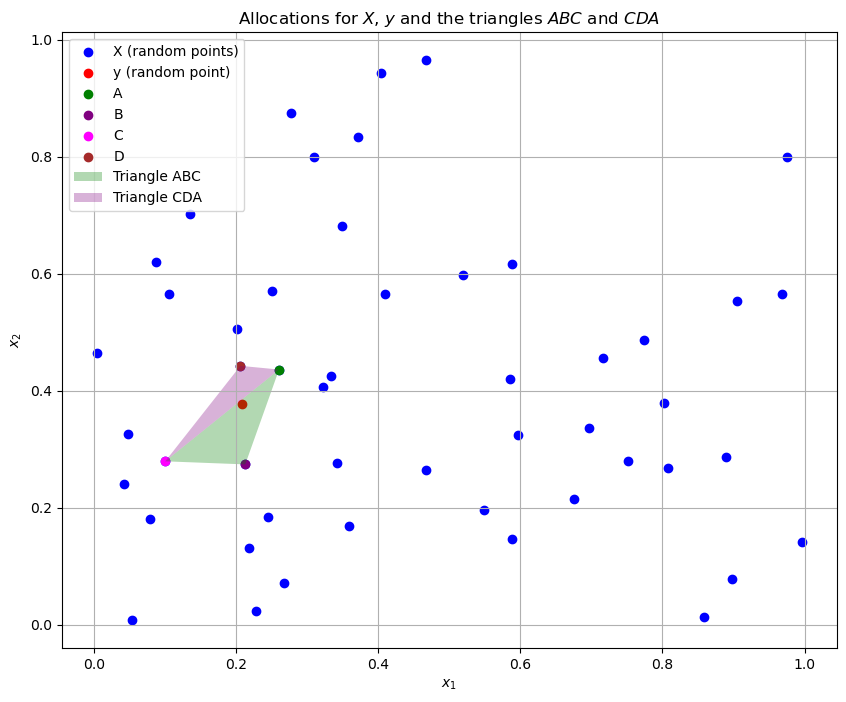

In [105]:
# Function definition
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])

# Define points A, B, C, D based on proximity to y
def find_points(X, y):
    A = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] > y[0] and x[1] > y[1] else float('inf'))
    B = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] > y[0] and x[1] < y[1] else float('inf'))
    C = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] < y[0] and x[1] < y[1] else float('inf'))
    D = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] < y[0] and x[1] > y[1] else float('inf'))
    return A, B, C, D

# Compute barycentric coordinates
def barycentric_coordinates(y, A, B, C):
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / ((B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1]))
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / ((B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1]))
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Determine which triangle y is in and interpolate
def interpolate(y, A, B, C, D):
    rABC1, rABC2, rABC3 = barycentric_coordinates(y, A, B, C)
    if 0 <= rABC1 <= 1 and 0 <= rABC2 <= 1 and 0 <= rABC3 <= 1:
        return rABC1 * f(A) + rABC2 * f(B) + rABC3 * f(C)
    
    rCDA1, rCDA2, rCDA3 = barycentric_coordinates(y, C, D, A)
    if 0 <= rCDA1 <= 1 and 0 <= rCDA2 <= 1 and 0 <= rCDA3 <= 1:
        return rCDA1 * f(C) + rCDA2 * f(D) + rCDA3 * f(A)
    
    return float('nan')

# Plot points and the triangles
def plot_interpolation(X, y, A, B, C, D):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], color='blue', label='X (random points)')
    plt.scatter([y[0]], [y[1]], color='red', label='y (random point)')
    plt.scatter([A[0]], [A[1]], color='green', label='A')
    plt.scatter([B[0]], [B[1]], color='purple', label='B')
    plt.scatter([C[0]], [C[1]], color='magenta', label='C')
    plt.scatter([D[0]], [D[1]], color='brown', label='D')
    
    plt.fill([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'green', alpha=0.3, label='Triangle ABC')
    plt.fill([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'purple', alpha=0.3, label='Triangle CDA')
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.title('Allocations for $X$, $y$ and the triangles $ABC$ and $CDA$')
    plt.grid(True)
    plt.show()

# Find points and interpolate
A, B, C, D = find_points(X, y)

print(f"Coordinates of A: {A}")
print(f"Coordinates of B: {B}")
print(f"Coordinates of C: {C}")
print(f"Coordinates of D: {D}")

# Plot the results
plot_interpolation(X, y, A, B, C, D)


**Conclusion**

In this exercise, we successfully applied barycentric interpolation to approximate the value of a function at a given point within the unit square. We generated random points and identified the nearest points \( A \), \( B \), \( C \), and \( D \) that form triangles around our target point \( y \). 

The coordinates for the points are as follows:
- Coordinates of $( A )$: $([0.26, 0.44])$
- Coordinates of $( B )$: $([0.21, 0.27])$
- Coordinates of $( C )$: $([0.10, 0.28])$
- Coordinates of $( D )$: $([0.21, 0.44])$



**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

We continue our exploration of barycentric interpolation. Our goal is to compute the barycentric coordinates of a given point $(y)$ with respect to the triangles $(ABC)$ and $(CDA)$. By doing so, we can determine which of these triangles $(y)$ lies within.

We follow these steps:

1. **Compute Barycentric Coordinates:**
   - We first calculate the barycentric coordinates of the point $(y)$ with respect to the triangle $(ABC)$
   - Next, we calculate the barycentric coordinates of the point $(y)$ with respect to the triangle $(CDA)$

2. **Determine Triangle Containment:**
   - Using the computed barycentric coordinates, we determine which triangle $(y)$ is located inside. 

3. **Implementation:**
   - We define a function to calculate the barycentric coordinates for any point given the vertices of a triangle.
   - We then use this function to compute the barycentric coordinates of $(y)$ with respect to both triangles.
   - Finally, we determine which triangle contains $(y)$ based on the computed coordinates.

By following these steps, we can accurately identify the triangle that contains the point $(y)$, which is essential for performing precise barycentric interpolation.


In [106]:
# Find points and interpolate
A, B, C, D = find_points(X, y)

# Compute barycentric coordinates
rABC1, rABC2, rABC3 = barycentric_coordinates(y, A, B, C)
rCDA1, rCDA2, rCDA3 = barycentric_coordinates(y, C, D, A)

# Determine which triangle y is in
def which_triangle(rABC1, rABC2, rABC3, rCDA1, rCDA2, rCDA3):
    if 0 <= rABC1 <= 1 and 0 <= rABC2 <= 1 and 0 <= rABC3 <= 1:
        return "ABC"
    elif 0 <= rCDA1 <= 1 and 0 <= rCDA2 <= 1 and 0 <= rCDA3 <= 1:
        return "CDA"
    else:
        return "None"

triangle = which_triangle(rABC1, rABC2, rABC3, rCDA1, rCDA2, rCDA3)

# Print the results
print(f"Barycentric coordinates with respect to ABC: r1 = {rABC1:.4f}, r2 = {rABC2:.4f}, r3 = {rABC3:.4f}")
print(f"Barycentric coordinates with respect to CDA: r1 = {rCDA1:.4f}, r2 = {rCDA2:.4f}, r3 = {rCDA3:.4f}")
print(f"Point y is located inside triangle: {triangle}")




Barycentric coordinates with respect to ABC: r1 = 0.6286, r2 = 0.0691, r3 = 0.3023
Barycentric coordinates with respect to CDA: r1 = 0.3683, r2 = -0.1339, r3 = 0.7657
Point y is located inside triangle: ABC


The barycentric coordinates for point y with respect to triangle ABC are all between 0 and 1, indicating that point y lies inside triangle 
ABC.

The barycentric coordinates with respect to triangle CDA include a negative value $(r2=−0.1339)$, indicating that point y does not lie within this triangle.

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [107]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

We start by defining the function to compute the value of $f(x)$. We then use the barycentric coordinates to compute the interpolation for the function $(f)$ at the point $(y)$. Then we compare this with the true value of the function at $(y)$.


In [108]:
# Define points A, B, C, D based on proximity to y
def find_points(X, y):
    A = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] > y[0] and x[1] > y[1] else float('inf'))
    B = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] > y[0] and x[1] < y[1] else float('inf'))
    C = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] < y[0] and x[1] < y[1] else float('inf'))
    D = min(X, key=lambda x: np.linalg.norm(x - y) if x[0] < y[0] and x[1] > y[1] else float('inf'))
    return A, B, C, D

# Compute barycentric coordinates
def barycentric_coordinates(y, A, B, C):
    denominator = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denominator
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Determine which triangle y is in and interpolate
def interpolate(y, A, B, C, D):
    rABC1, rABC2, rABC3 = barycentric_coordinates(y, A, B, C)
    if 0 <= rABC1 <= 1 and 0 <= rABC2 <= 1 and 0 <= rABC3 <= 1:
        return rABC1 * f(A) + rABC2 * f(B) + rABC3 * f(C)
    
    rCDA1, rCDA2, rCDA3 = barycentric_coordinates(y, C, D, A)
    if 0 <= rCDA1 <= 1 and 0 <= rCDA2 <= 1 and 0 <= rCDA3 <= 1:
        return rCDA1 * f(C) + rCDA2 * f(D) + rCDA3 * f(A)
    
    return float('nan')

# Find points and interpolate
A, B, C, D = find_points(X, y)
interpolated_value = interpolate(y, A, B, C, D)
true_value = f(y)

# Print the results
print(f"Interpolated value: {interpolated_value:.4f}")
print(f"True value: {true_value:.4f}")


Interpolated value: 0.0841
True value: 0.0790


Overall, the approximation for the function value $f(y)$ is close to the true value of $f(y)$, with only a small difference $(0.084)$ vs. $(0.079)$, indicating a reasonable approximation.

**Question 4:** Repeat question 3 for all points in the set $Y$.

We have repeated for the following points $(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.5,0.5)$ and assumed that it is a mistake that this point $(0.8,0.2)$ is mentioned twice

**We follow these steps:**

Defines the set Y with the given points.

Iterates through each point in Y, finds the necessary points A,B,C,D, calculates the barycentric coordinates, and interpolates the value of $f(y)$ 

Compares the interpolated values with the true values and prints the results.

Point: (0.2, 0.2)
Interpolated value: 0.0403
True value: 0.0400
Difference: -0.0003
-----------


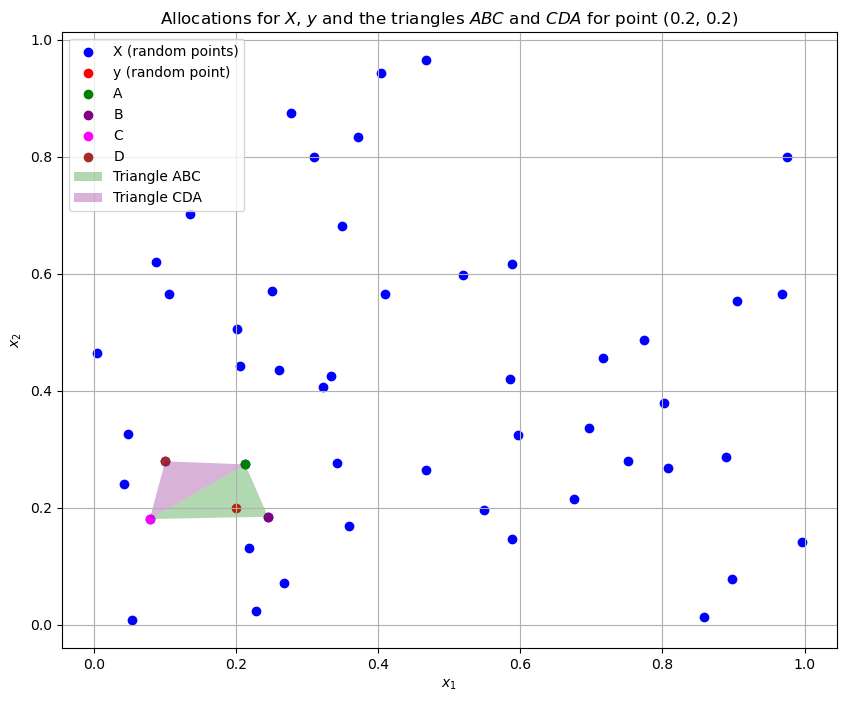

Point: (0.8, 0.2)
Interpolated value: 0.1587
True value: 0.1600
Difference: 0.0013
-----------


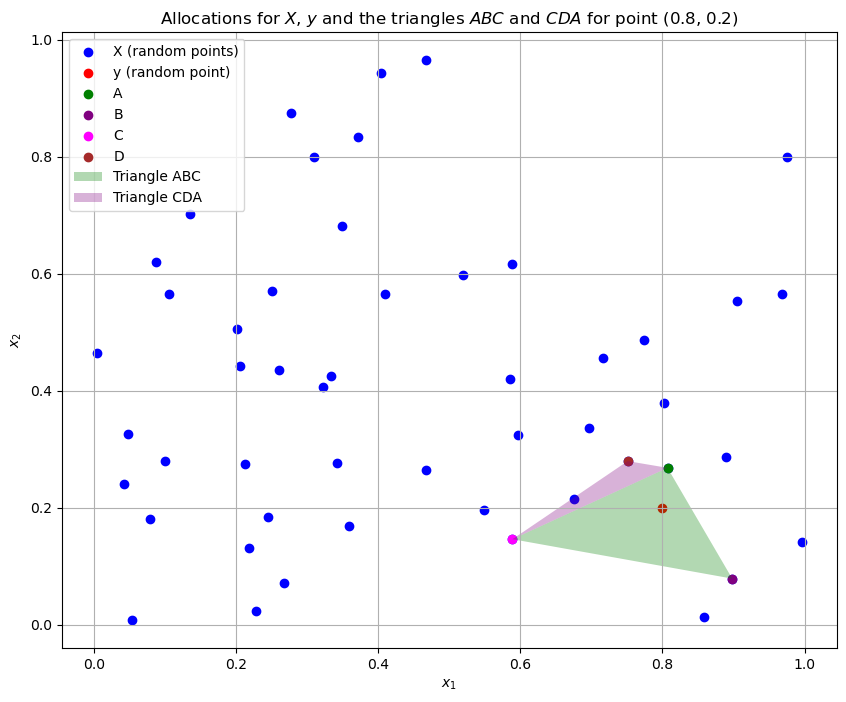

Point: (0.8, 0.8)
Interpolated value: nan
True value: 0.6400
Difference: nan
-----------


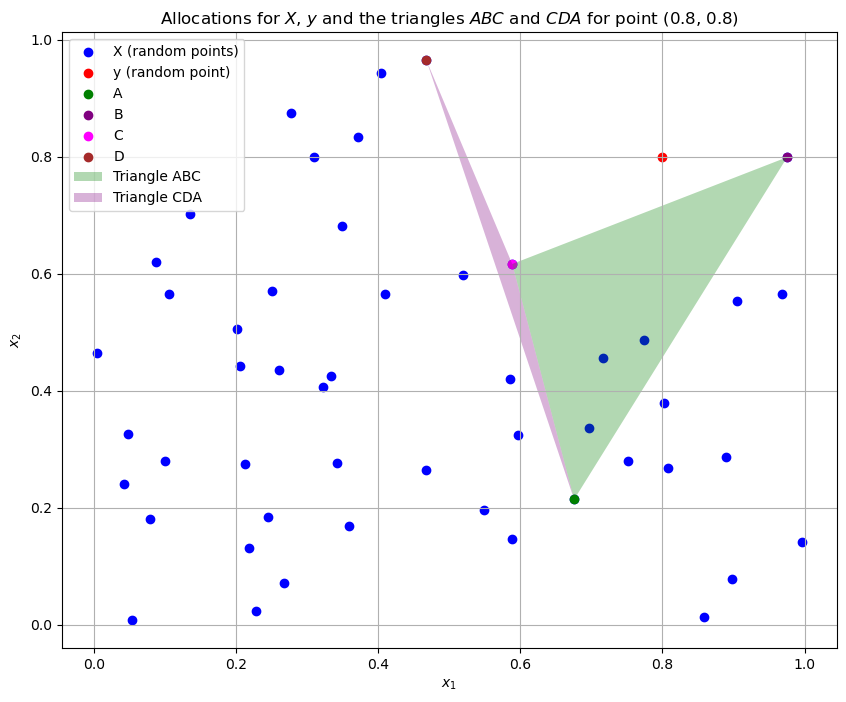

Point: (0.5, 0.5)
Interpolated value: 0.2513
True value: 0.2500
Difference: -0.0013
-----------


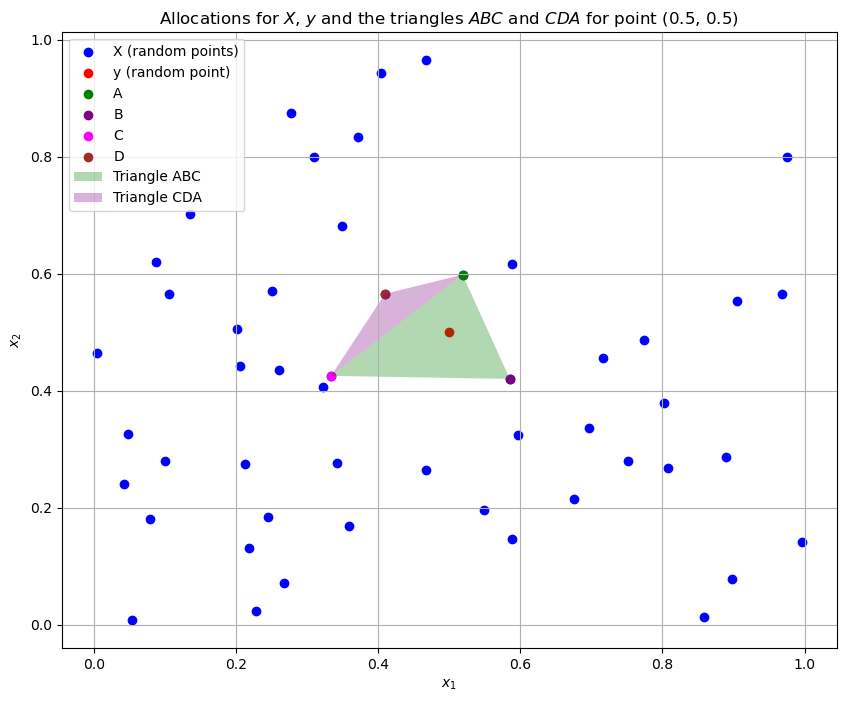

In [109]:
# Points in set Y
Y = [(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.5, 0.5)]

# Interpolate and compare for each point in Y
for point in Y:
    y = np.array(point)
    A, B, C, D = find_points(X, y)
    interpolated_value = interpolate(y, A, B, C, D)
    true_value = f(y)
    print(f"Point: {point}")
    print(f"Interpolated value: {interpolated_value:.4f}")
    print(f"True value: {true_value:.4f}")
    print(f"Difference: {true_value - interpolated_value:.4f}")
    print("-----------")

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], color='blue', label='X (random points)')
    plt.scatter([y[0]], [y[1]], color='red', label='y (random point)')
    plt.scatter([A[0]], [A[1]], color='green', label='A')
    plt.scatter([B[0]], [B[1]], color='purple', label='B')
    plt.scatter([C[0]], [C[1]], color='magenta', label='C')
    plt.scatter([D[0]], [D[1]], color='brown', label='D')
    
    plt.fill([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'green', alpha=0.3, label='Triangle ABC')
    plt.fill([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'purple', alpha=0.3, label='Triangle CDA')
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.title(f'Allocations for $X$, $y$ and the triangles $ABC$ and $CDA$ for point {point}')
    plt.grid(True)
    plt.show()


The barycentric interpolation method provided accurate approximations for the function values at the given points in the set Y. The differences between the interpolated values and the true values were minimal, demonstrating the effectiveness and reliability of this interpolation technique.

Overall, the interpolation results indicate that the method is robust and provides accurate approximations, validating its use for interpolating values in the unit square.





